<a href="https://colab.research.google.com/github/Hena-123/095_HenaPatel/blob/main/Lab4_DT_Weather_Entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decsion Tree classifier**

### **Step 1: Import necessary libraries.**



In [ ]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### **Step 2: Prepare dataset.**

In [ ]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast',
            'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
            'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
            'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

### **Step 3: Digitize the data set using encoding**

### **Step 4: Merge different features to prepare dataset**

In [ ]:
data = {'Outlook':Outlook, 'Temp':Temperature, 'Wind':Wind, 'Humidity':Humidity}

In [ ]:
headings = {
    'Outlook':np.unique(Outlook).tolist(),
    'Temp':np.unique(Temperature).tolist(),
    'Wind':np.unique(Wind).tolist(),
    'Humidity':np.unique(Humidity).tolist()
}

In [ ]:
#creating OneHotEncoder
ohe = preprocessing.OneHotEncoder()
name_mapping={}
new_data = pd.DataFrame()

for heading in data:
    # Converting string labels into numbers.
    feature = pd.DataFrame(data[heading])
    encoded = ohe.fit_transform(feature)
    encoded = encoded.toarray()
    encoded = pd.DataFrame(encoded)
    encoded.columns = headings[heading]
    new_data = pd.concat([new_data,encoded],axis=1)

le = preprocessing.LabelEncoder()
target = le.fit_transform(Play)

In [ ]:
target

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
new_data

,Overcast,Rainy,Sunny,Cool,Hot,Mild,False,True,High,Normal
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
8,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
9,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


### **Step 5: Train ’Create and Train DecisionTreeClassifier’**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, random_state=1) 

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=95,random_state=95) # Define the classifier
clf = clf.fit(X_train,y_train)  # Train the classifier
y_pred = clf.predict(X_test)  #Predict the response for test dataset


In [ ]:
confusion_matrix(y_test, y_pred)

print("y predicted : ", y_pred)
print(f"Actual y_test {y_test}")
print(metrics.classification_report(y_test, y_pred,zero_division=0))

y predicted :  [0 0 1 1]
Actual y_test [1 0 1 1]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



Confusion matrix:
[[1 0]
 [1 2]]


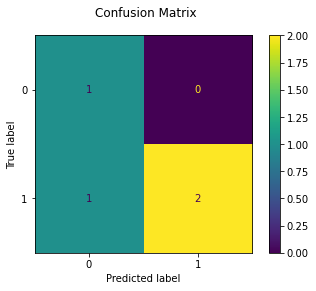

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

    Step 6: Predict Output for new data

**Questions: For Task - 1**

(1) What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’?

(2) What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity =’High’, and Wind = ’True’?

(3) Accuracy , precision and recall of both Models?

In [ ]:
#Predict Output
# Overcast	Rainy	Sunny	Cool	Hot	Mild	False	True	High	Normal
print(clf.predict([[0,1,0 ,0,0,1, 1,0, 0,1]]))
print(clf.predict([[0,0,1 ,1,0,0, 0,1, 1,0]]))

[1]
[0]


    Step 7: Display Decsion Tree Created
     
     - This step requires graphviz and tkinter packages installed 

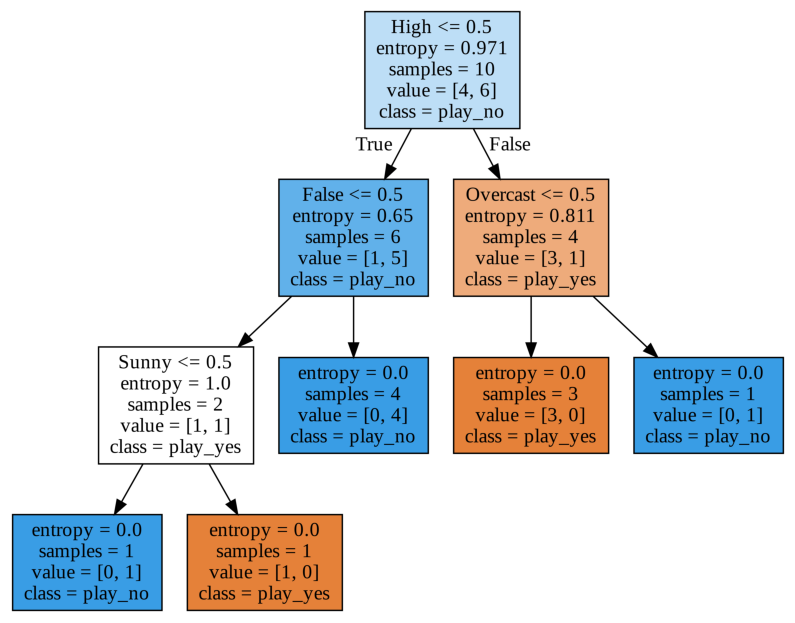

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='tree_entropy.dot',
                feature_names=new_data.columns.to_list(),
                class_names=['play_yes','play_no'], filled=True)

#Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png', '-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();
